# Birthday problem

The [birthday problem](https://en.wikipedia.org/wiki/Birthday_problem) considers a number of randomly selected persons and asks for the probability that at least two of these persons have their birthday on the same day of the year. For simplicity, we will neglect leap years and therefore assume that each year has 365 days. 

While there exists an analytical solution to the probability as a function of the number of persons, we want to analyze the problem by means of a simulation drawing birthdays at random.

In a first step, we consider a random realization of birthdays for a given number of persons. The function ``equal_birthdays`` should create this realization and determine whether among these birthdays at least two of them are equal.

Hints:
* Find a function provided by the ``random`` module suited for this problem. Remember the ``help`` function which allows to obtain information about modules and functions provided by these modules.
* If you need help about how to determine coincidences, you might want to take a look at this [notebook](~ListsAndSets.ipynb).

In [6]:
# put import statements here, if needed
### BEGIN SOLUTION
import random
### END SOLUTION

def equal_birthdays(npersons):
    """determine occurrence of equal birthdays

       For a given number of persons a random realization
       of birthdays is created. The function determines whether
       at least two persons have the same birthday.

       npersons: number of persons

    """
    ### BEGIN SOLUTION
    birthdays = set()
    for nperson in range(npersons):
        birthdays.add(random.randint(1, 365))
        if len(birthdays) != nperson+1:
            return True
    return False
    ### END SOLUTION

Executing the following two cells will give you an idea of whether your function works correctly.

In [9]:
result = equal_birthdays(2)
assert result is not None, 'Does your function return a result?'
assert type(result) == type(True), 'The function does not return a boolean value.'

In [14]:
for seed, result in ((42, False), (192347, True)):
    random.seed(seed)
    assert equal_birthdays(20) == result, 'Your function appears to return an incorrect result.'

With the help of the function ``equal_birthdays``, you can now develop a function ``probability_equal_birthdays`` which determines for a given number of realizations the probability that among a given number of persons at least two of them have their birthday on the same day of the year.

In [7]:
def probability_equal_birthdays(npersons, realizations=10000):
    """determine probability for equal birthdays

       Given a number of persons and of random realizations,
       the probability is determined that at least two persons
       have the same birthday.

       npersons: number of persons
       realizations: number of realizations of random ensembles,
                 default is 10000

    """
    ### BEGIN SOLUTION
    coincidence = 0
    for _ in range(realizations):
        if equal_birthdays(npersons):
            coincidence = coincidence+1
    return coincidence/realizations
    ### END SOLUTION

Execute the following two cells to check the correctness of your function. Note though, that you should not only rely on these tests. One possibility for additional checks is to compare the results obtained from your function with the probabilities listed on this [Wikipedia page](https://en.wikipedia.org/wiki/Birthday_problem). You might also want to take a look at how the results depend on the number of realizations.

In [16]:
result = probability_equal_birthdays(2, 20)
assert result is not None, 'Does your function return a result?'
assert type(result) == type(1.), 'The function does not return a float.'

In [24]:
random.seed(42)
for npersons, result in ((10, 0.1221), (20, 0.417), (30, 0.7026)):
    assert abs(probability_equal_birthdays(npersons, 10000)-result) < 0.0001, (
        'Your function appears to return an incorrect result.')

Finally, you should determine the probability for the occurrence of birthday coincidences as a function of the number of persons considered. Your code should produce a list of tuples where each tuple contains two values, namely the number of persons and the corresponding probability. Giving this list of tuples to the provided function ``plot`` will generate a graphical representation. 

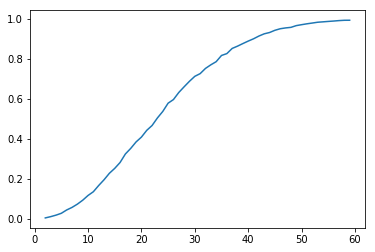

In [25]:
import matplotlib.pyplot as plt

def plot(data):
    """plot a curve from a list of tuples

       data: list of tuples (x, y)

    """
    plt.plot(*list(zip(*data)))
    plt.show()

### BEGIN SOLUTION
coincidencelist = []
for npersons in range(2, 60):
    coincidencelist.append((npersons, probability_equal_birthdays(npersons)))
### END SOLUTION
plot(coincidencelist)

And do not forget to save your work...